In [1]:
# Import Libraries

from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Model and test data loading

modello = load_model('E:\whistle_identification\DOLPHI\\vgg16_trained_model_2_48kHz.keras')

test_X = np.load('E:\whistle_identification\DOLPHI\\total_testX.npy', allow_pickle=True)
test_y = np.load('E:\whistle_identification\DOLPHI\\total_testY.npy', allow_pickle=True)
test_y = test_y.astype(np.int32)


In [3]:
# Prediction...
""" test_X = np.concatenate((test_X1,test_X2), axis = 0)
test_y = np.concatenate((test_y1,test_y2), axis = 0) """
y_pred = modello.predict(test_X)

y_pred1 = []


for i in y_pred:
    if i[0]>= 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

y_pred1 = np.array(y_pred1)

35/35 [==============================] - 336s 9s/step


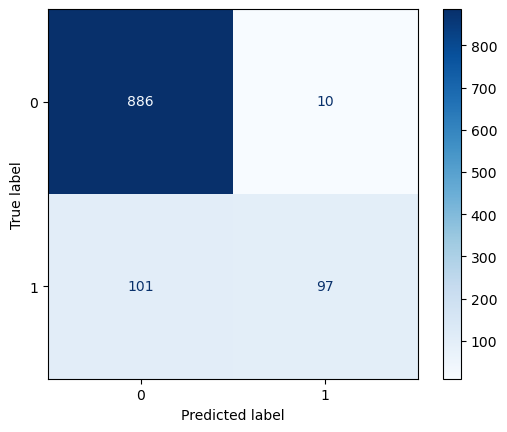

In [5]:
# Confusion Matrix 


cm = confusion_matrix(test_y, y_pred1, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [6]:
# Metrics calculation

print(classification_report(test_y,y_pred1)) # accuracy = 0.898

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       896
           1       0.91      0.49      0.64       198

    accuracy                           0.90      1094
   macro avg       0.90      0.74      0.79      1094
weighted avg       0.90      0.90      0.89      1094

